# Anush Dubey - 20MIP10001

In [1]:
!nvidia-smi

Fri Sep  8 17:45:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://images.pexels.com/photos/62689/pexels-photo-62689.jpeg' save=True

/content
2023-09-08 17:47:09.167678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 17:47:10.039776: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 1.89M/1.89M [00:00<00:00, 36.6MB/s]
image 1/1 /content/pexels-photo-62689.jpeg: 640x640 1 cup, 3 laptops, 2 keyboards, 1 scissors, 7.9ms
Speed: 0.8ms pre-process, 7.9ms inference, 81.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


/content


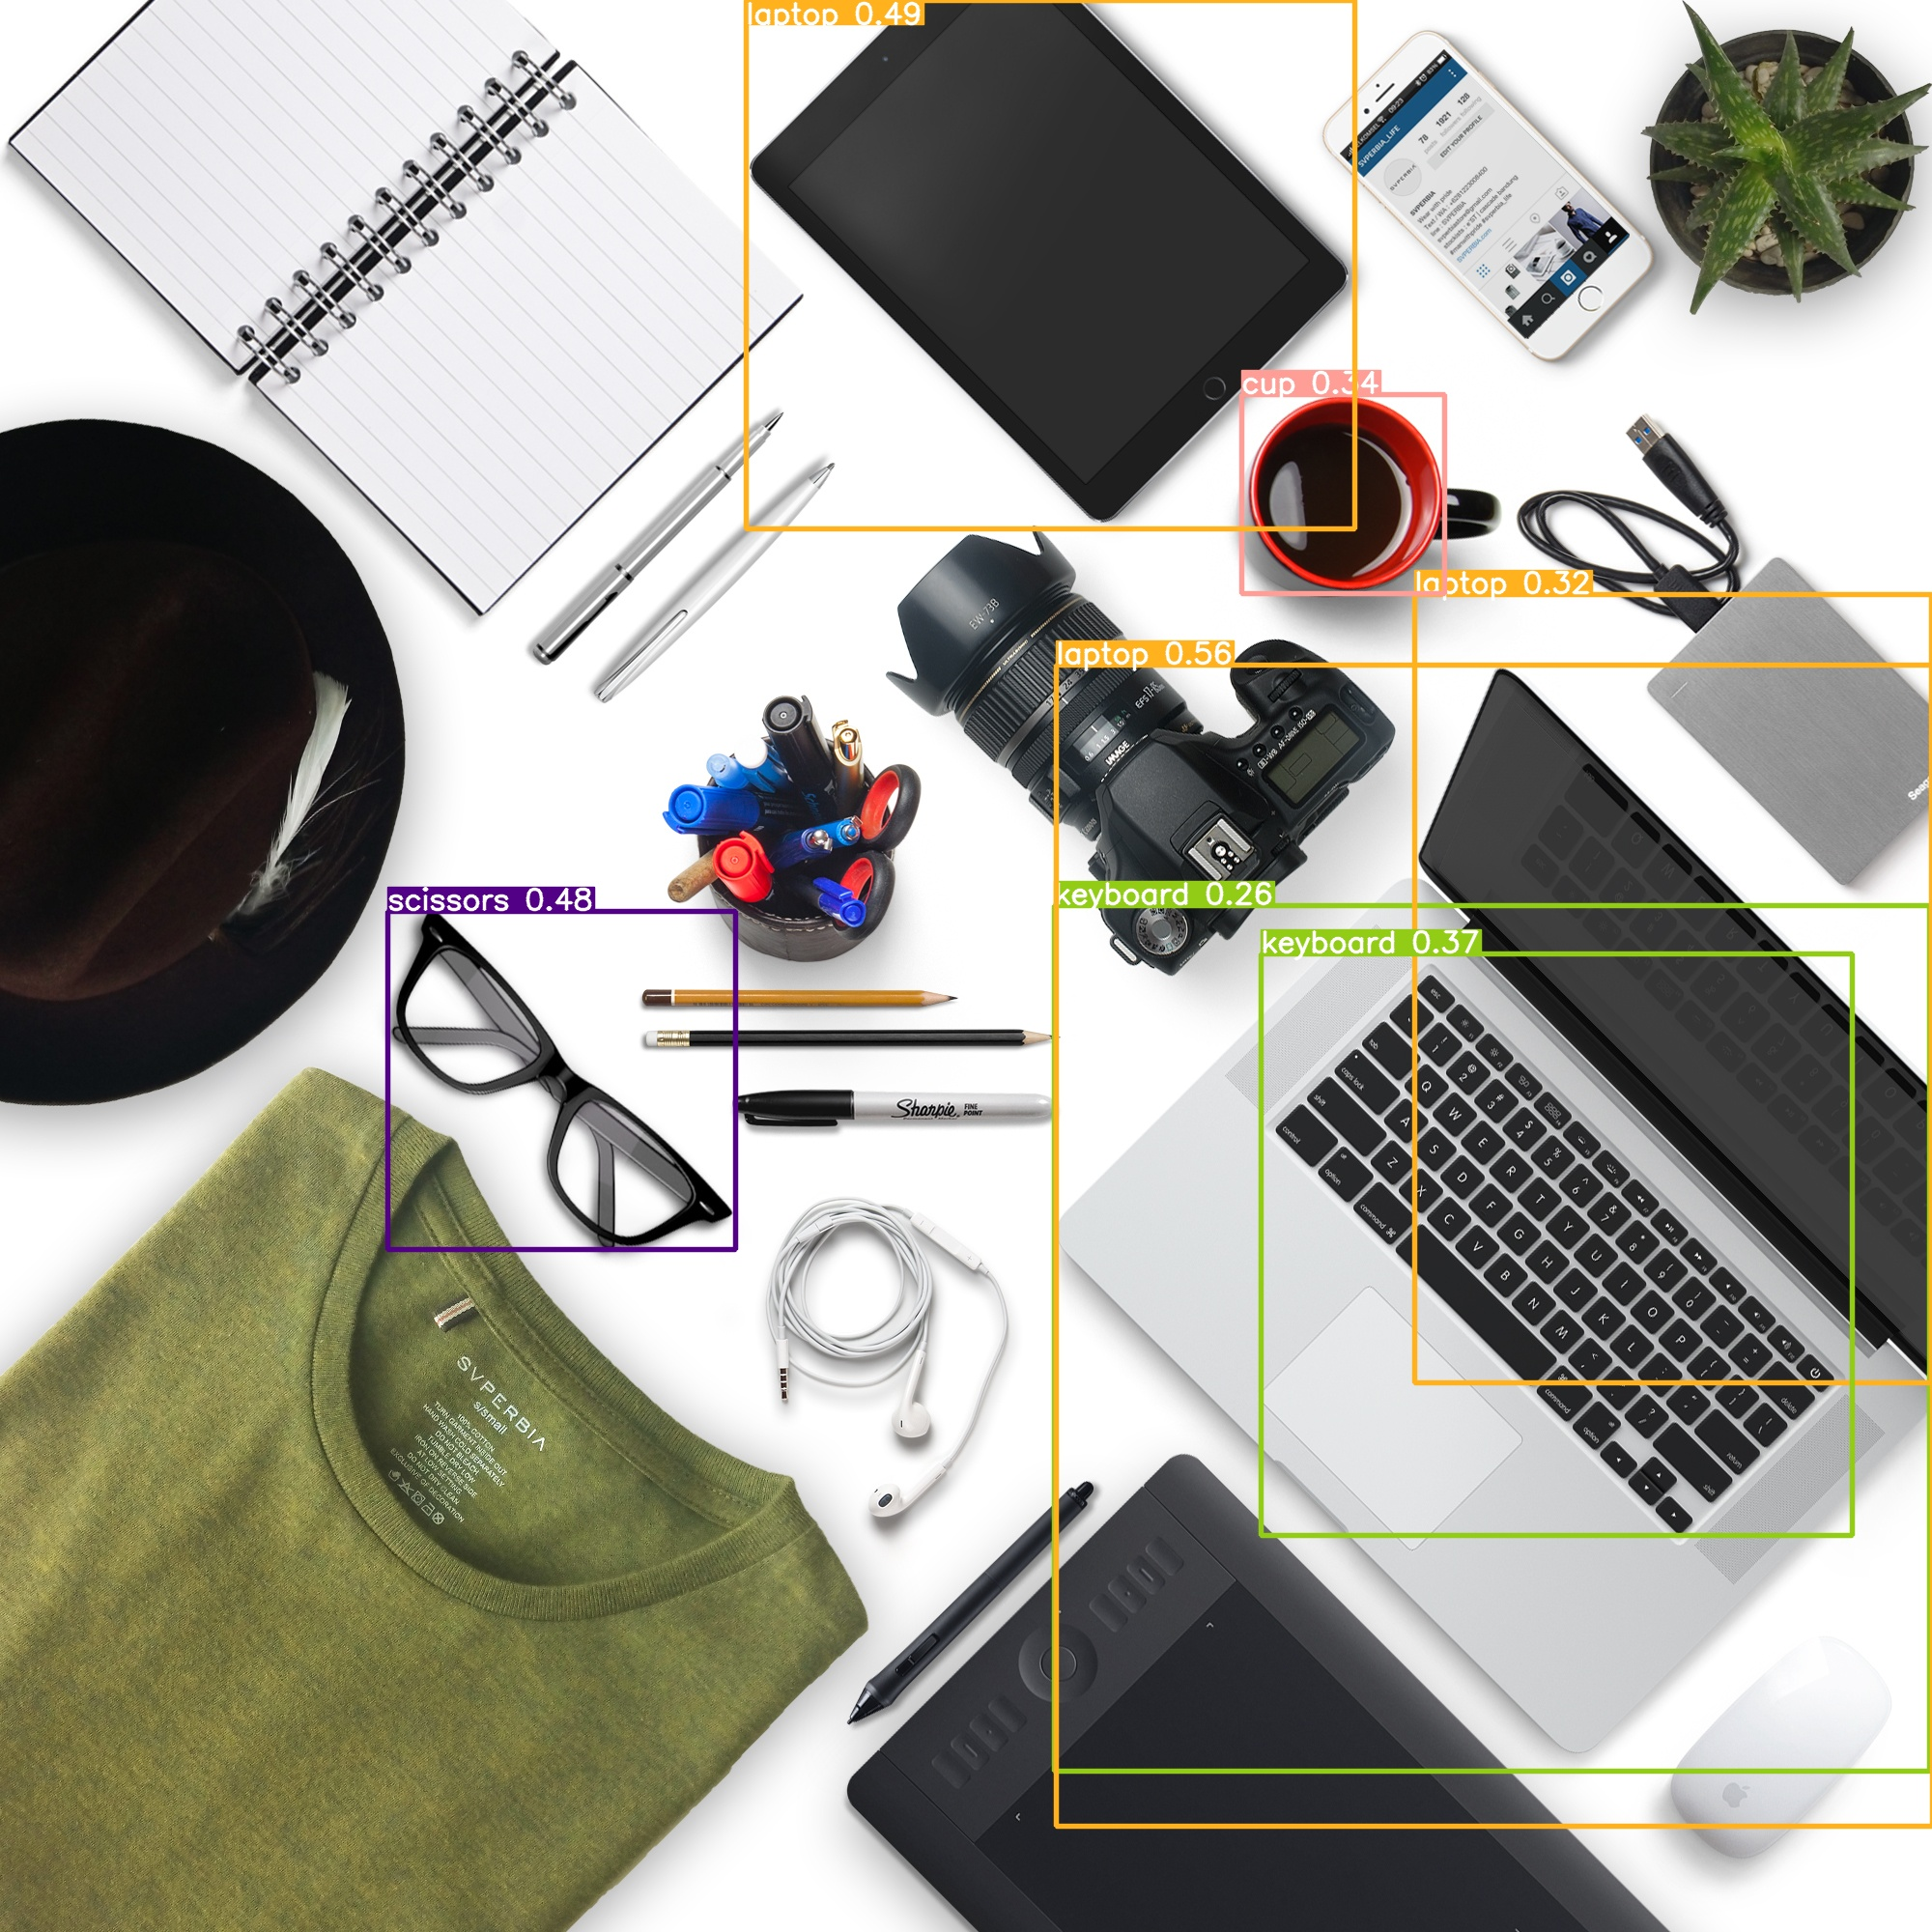

In [9]:
%cd {HOME}
Image(filename='runs/detect/predict2/pexels-photo-62689.jpeg', height=600)

In [10]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://images.pexels.com/photos/62689/pexels-photo-62689.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://images.pexels.com/photos/62689/pexels-photo-62689.jpeg locally at pexels-photo-62689.jpeg


In [11]:
results[0].boxes.xyxy

tensor([[1093.,  688., 2000., 1890.],
        [ 772.,    0., 1402.,  547.],
        [ 401.,  943.,  761., 1293.],
        [1305.,  987., 1917., 1589.],
        [1285.,  408., 1495.,  614.],
        [1464.,  615., 1999., 1431.],
        [1091.,  937., 1997., 1833.]], device='cuda:0')

In [12]:
results[0].boxes.conf

tensor([0.56028, 0.48799, 0.48354, 0.36699, 0.34111, 0.31638, 0.26467], device='cuda:0')

In [13]:
results[0].boxes.cls

tensor([63., 63., 76., 66., 41., 63., 66.], device='cuda:0')